<a href="https://colab.research.google.com/github/dudaribeiro7/fundamentos_mecanica_estruturas_UFJF/blob/main/%5BMAC019%5D_P1_2022_1_grupo_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Condições Gerais



Essa tarefa tem como objetivo avaliar os conhecimentos adquiridos durante a disciplina de Fundamentos de Mecânica das Estruturas.


As condicões abaixo devem ser observadas: 

1. Serão formadas equipes e cada uma delas com até e 4 integrantes. 

2. A avaliação será realizada por meio da entrega de um relatório com a contextualização da solução, explicação do desenvolvimento e os códigos desenvolvidos até a data estipulada.
 - O notebook do enunciado deverá ser usado para entrega do relatório
 - Cada questão deve conter a proposta de solução, com a explicação da metodologia empregada na solução

3. Os documentos necessários para a entrega do trabalho são (1) um relatório com a explicação das soluções e (2) os códigos desenvolvidos pela equipe. 
A equipe deve usar este modelo de notebook para desenvolver os códigos. Os pontos (1) e (2) podem ser entregues no notebook de enunciado.


4. Um dos integrantes será indentificado como responsável pela entrega do documentos necessários.

5. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.

6. As equipes devem ser formadas até às **18 horas o dia 28/06/2021** por meio do preenchimento da planilha [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit?usp=sharing).

7. A formação das equipes pode ser acompanhada arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit?usp=sharing). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 1 (A1, B1, C1, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

8. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

9. A equipe depe indicar no arquivo [[MAC019] Formação das Equipes](https://docs.google.com/spreadsheets/d/1XhCWfpfDqR951V5RHR1aS_dBhocfzFNLdZe8NpCO-Ng/edit?usp=sharing) um responsável pela entrega do projeto. 

10. A entrega dos projetos (relatórios e códigos) deve ocorrer até às **23:59 do dia 05/07/2021** na plataforma da disciplina pelo responsável pela entrega. **Os arquivos devem ser compartilhados com leonardo.goliatt@ufjf.br** 


11. Entregas realizadas após a data estipulada terão a nota da avaliação multiplicada por um coeficiente de **0.80**, cumulativo com os coeficientes de outros atrasos caso ocorram.

12. Quaiquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.



# Importando os pacotes necessários:

In [ ]:
!pip install anastruct

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.9 MB/s 


In [ ]:
from anastruct import SystemElements
import numpy as np
import pylab as pl
import pandas as pd
import sympy as sp

# Problema 1 (20 pontos)



Considere a estrutura de torre de transmissão de energia abaixo. As cargas aplicadas na torre podem variar de maneira independente em angulação, deste -15 graus até +15 graus em relação a vertical. 
Por exemplo, uma carga pode estar a -5 graus e outra a -12 graus.
A figura abaixo mostra um caso onde os dois ângulos são iguais a +15 graus.


1. Apresente um modelo computacional da treliça abaixo e determine as forças em todos os elementos. Adicione rótulos aos elementos sem identificação.

2. Faça um gráfico mostrando a variação do ângulo das duas cargas e a força máxima na estrutura. Discuta o resultado encontrado.

Observação: ***A estrutura é simétrica e distância entre os apoios é de 5 m.***



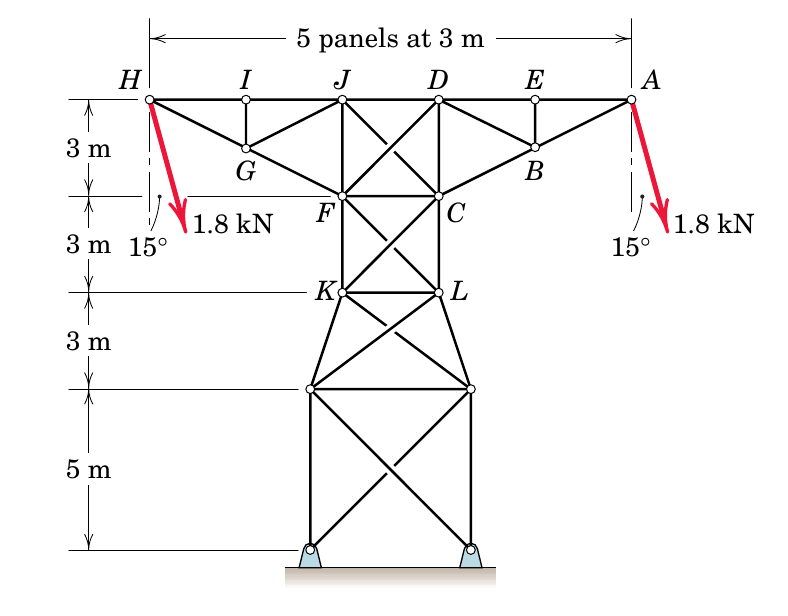


Após adicionar os rótulos aos elementos sem identificação, a estrutura ficou da seguinte forma:

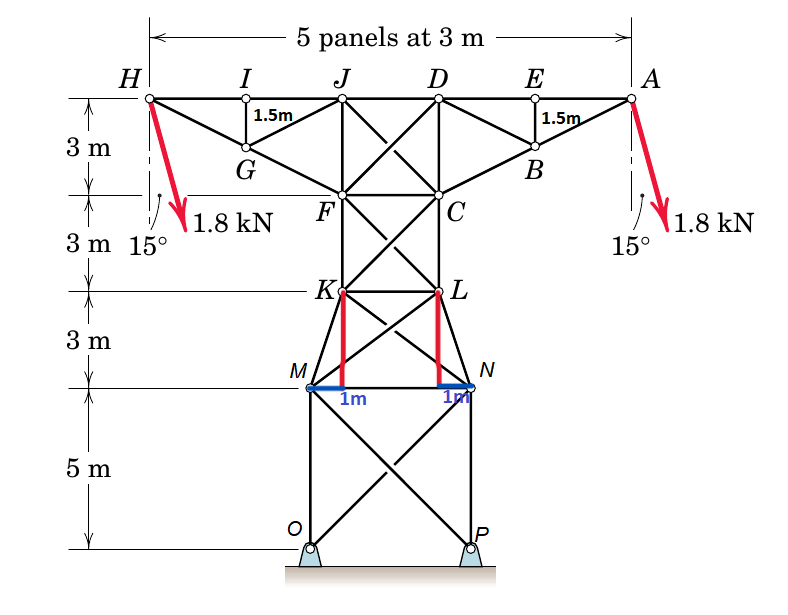

Parte 1 do problema:



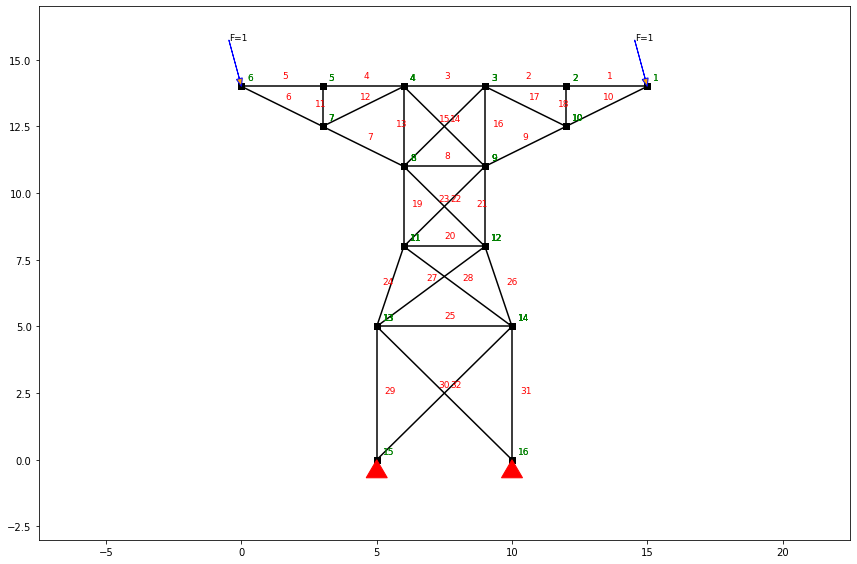

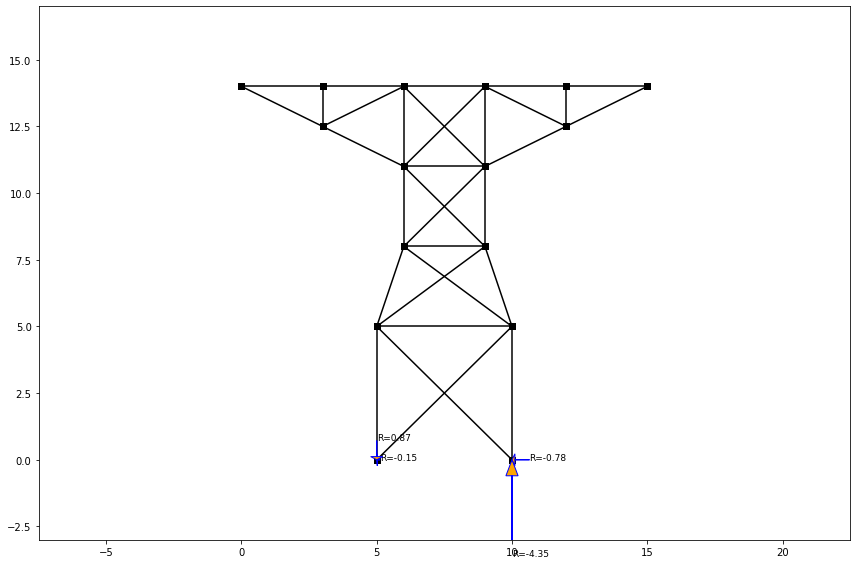

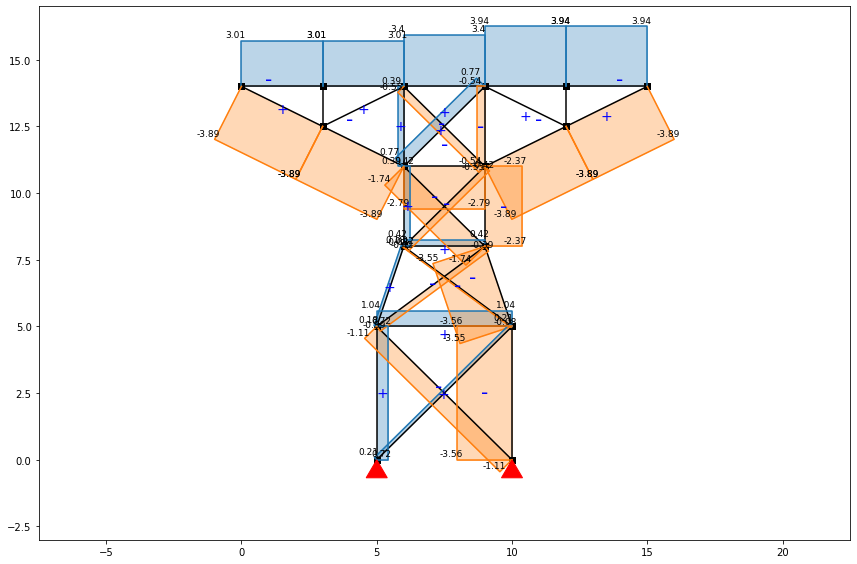

In [ ]:
ss = SystemElements()

print("Parte 1 do problema:\n")

# Dicionário para os nós:
node={
      "A":(15,14), "E":(12,14),  "D":(9,14),    "J":(6,14), "I":(3,14), 
      "H":(0,14),  "G":(3,12.5), "B":(12,12.5), "F":(6,11), "C":(9,11), 
      "K":(6,8),   "L":(9,8),    "M":(5,5),     "N":(10,5), "O":(5,0), 
      "P":(10,0)
    }

# Conectividades entre os nós:
conec=[
        ('A', 'E'), ('E', 'D'), ('D', 'J'), ('J', 'I'), ('I', 'H'),
        ('H', 'G'), ('G', 'F'), ('F', 'C'), ('C', 'B'), ('B', 'A'),
        ('G', 'I'), ('G', 'J'), ('F', 'J'), ('J', 'C'), ('F', 'D'), ('D', 'C'), ('D', 'B'), ('B', 'E'),
        ('F', 'K'), ('K', 'L'), ('L', 'C'), ('F', 'L'), ('K', 'C'),
        ('K', 'M'), ('M', 'N'), ('N', 'L'), ('L', 'M'), ('K', 'N'),
        ('M', 'O'), ('O', 'N'), ('N', 'P'), ('P', 'M')
      ]

# As conectividades geram os elementos:
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_truss_element(location = element)

# Apoios:
n1 = ss.find_node_id(node['O'])
n2 = ss.find_node_id(node['P'])
ss.add_support_hinged(node_id=n1)
ss.add_support_hinged(node_id=n2)

# Carregamentos:
Fy = -1.8
node_H = ss.find_node_id(node['H'])
node_A = ss.find_node_id(node['A'])
ss.point_load(node_id=node_H, Fy=Fy, rotation=-15)
ss.point_load(node_id=node_A, Fy=Fy, rotation=-15)

# Resolve a estrutura:
ss.solve()

# Mostra a estrutura com seus resultados:
ss.show_structure()
ss.show_reaction_force()
ss.show_axial_force()

Parte 2 do problema:



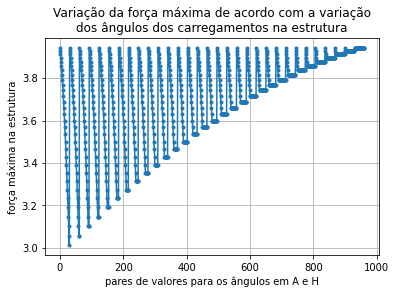


Sendo os pares de valores para os ângulos em A e H dados na tabela a seguir:



,Ângulo em A,Ângulo em H
0,-15,-15
1,-15,-14
2,-15,-13
3,-15,-12
4,-15,-11
...,...,...
956,15,11
957,15,12
958,15,13
959,15,14


In [ ]:
print("Parte 2 do problema:\n")

# Vetores para a variação dos ângulos:
ang_A = np.arange(-15, 15+1, 1)
ang_H = np.arange(-15, 15+1, 1)

max_force = []
pares = []

for a in ang_A:
  for h in ang_H:
    # Novos carregamentos:
    ss.point_load(node_id=node_H, Fy=Fy, rotation=-h)
    ss.point_load(node_id=node_A, Fy=Fy, rotation=-a)
    # Resolve a estrutura:
    ss.solve()
    # Resgata os resultados:
    element_results = ss.get_element_results()
    R=[]
    for er in element_results:
      R.append(er['N'])
    # Acrescenta a força máxima das barras no vetor:
    max_force.append(max(R))
    # Atualiza o vetor de pares de angulos:
    pares.append({'Ângulo em A':a, 'Ângulo em H':h})

# Monta o gráfico:
pl.plot(max_force, '.-')
pl.title("Variação da força máxima de acordo com a variação\ndos ângulos dos carregamentos na estrutura")
pl.xlabel('pares de valores para os ângulos em A e H')
pl.ylabel('força máxima na estrutura')
pl.grid()
pl.show()

print("\nSendo os pares de valores para os ângulos em A e H dados na tabela a seguir:\n")
T = pd.DataFrame(pares)
T

O resultado encontrado indica que quanto mais o ângulo do carregamento em H cresce, menor tende a ser a força máxima interna na estrutura, e, de forma contrária, quanto mais o ângulo do carregamento em A cresce, maior tende a ser a força máxima interna na estrutura. Logo, tem-se que a menor força máxima interna na estrutura, ou seja, a solução ótima, é encontrada quando se tem o menor ângulo para o carregamento em A (-15°) e o maior ângulo para o carregamento em H (15°).

# Problema 2 (20 pontos)

Apresente um modelo computacional para a estrutura abaixo.
Apresente uma tabela com as forças em cada uma das barras.
Os carregamentos da estrutura são mostrados na tabela seguinte.

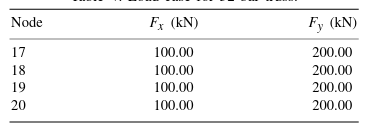

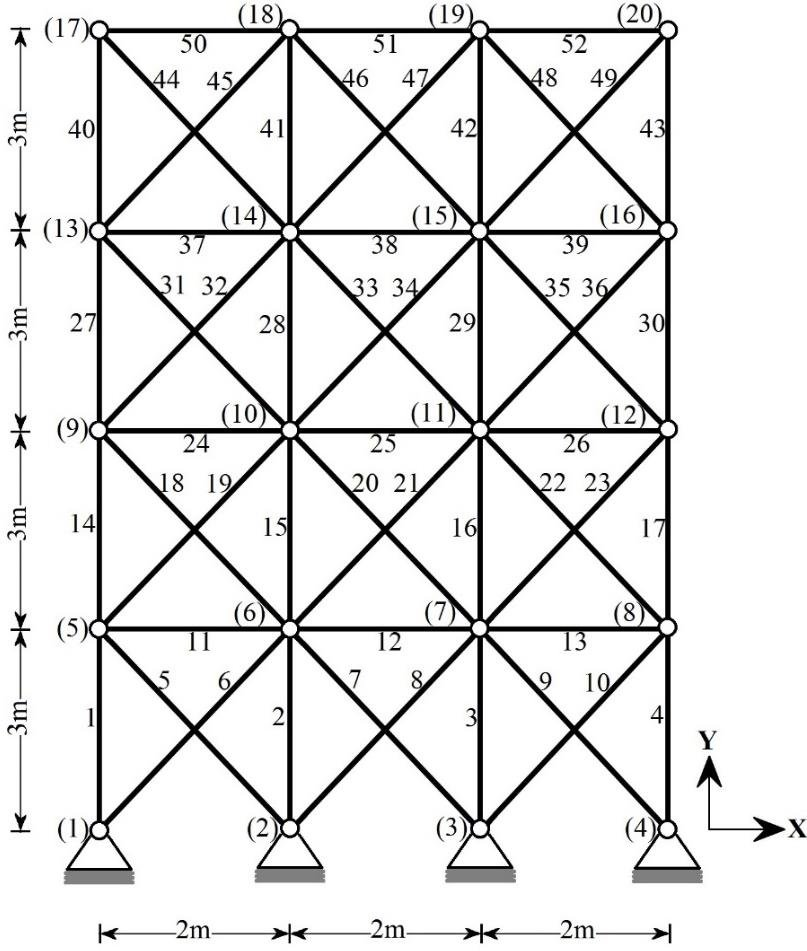

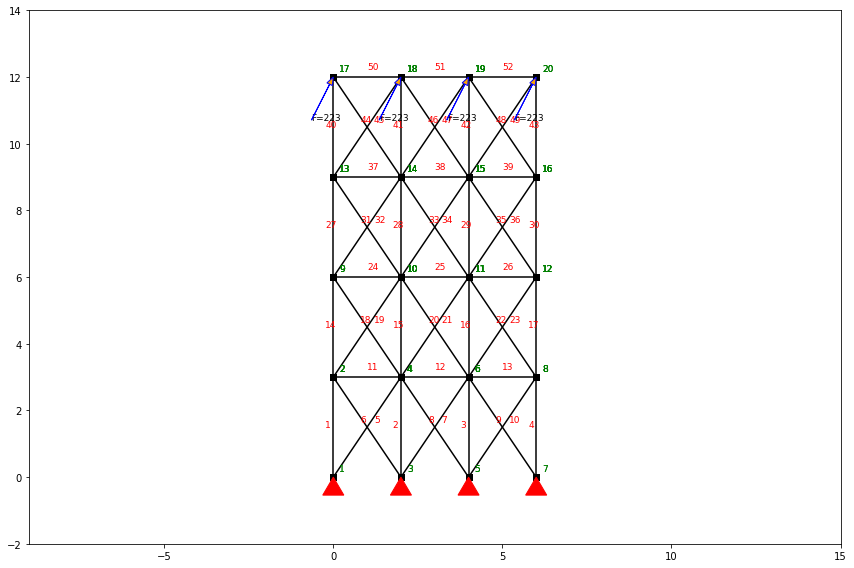

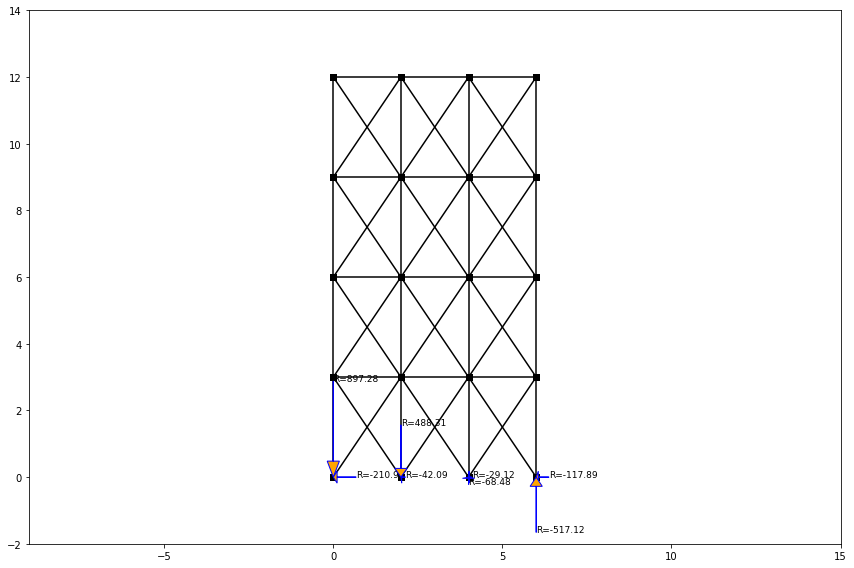

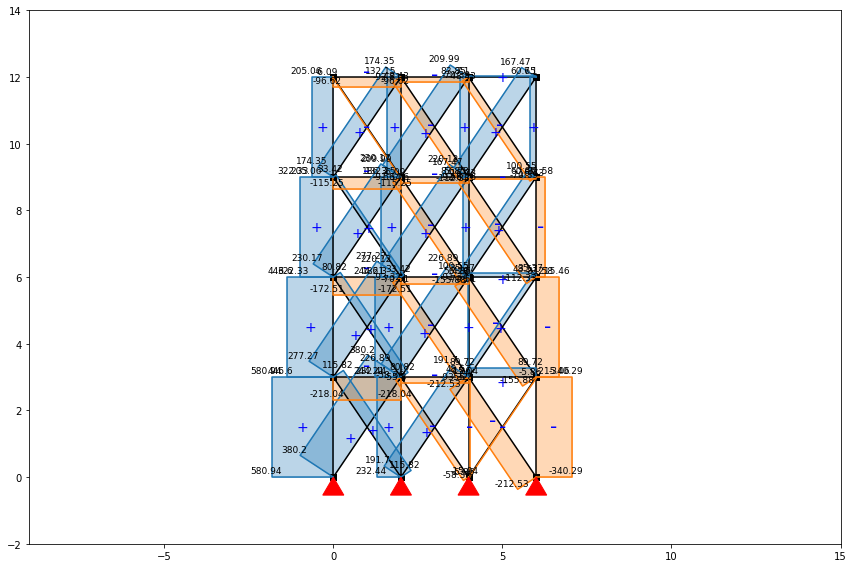

In [ ]:
ss = SystemElements()

# Dicionário para os nós:
node={
      "01":(0,0),  "02":(2,0),  "03":(4,0),  "04":(6,0),
      "05":(0,3),  "06":(2,3),  "07":(4,3),  "08":(6,3),
      "09":(0,6),  "10":(2,6),  "11":(4,6),  "12":(6,6),
      "13":(0,9),  "14":(2,9),  "15":(4,9),  "16":(6,9),
      "17":(0,12), "18":(2,12), "19":(4,12), "20":(6,12)
    }

# Conectividades entre os nós:
conec=[
        ('01', '05'), ('02', '06'), ('03', '07'), ('04', '08'),
        ('02', '05'), ('01', '06'), ('03', '06'), ('02', '07'), ('03', '08'), ('04', '07'),
        ('05', '06'), ('06', '07'), ('07', '08'),

        ('05', '09'), ('06', '10'), ('07', '11'), ('08', '12'),
        ('05', '10'), ('06', '09'), ('06', '11'), ('07', '10'), ('07', '12'), ('08', '11'),
        ('09', '10'), ('10', '11'), ('11', '12'),

        ('09', '13'), ('10', '14'), ('11', '15'), ('12', '16'),
        ('09', '14'), ('10', '13'), ('10', '15'), ('11', '14'), ('11', '16'), ('12', '15'),
        ('13', '14'), ('14', '15'), ('15', '16'),

        ('13', '17'), ('14', '18'), ('15', '19'), ('16', '20'),
        ('13', '18'), ('14', '17'), ('14', '19'), ('15', '18'), ('15', '20'), ('16', '19'),
        ('17', '18'), ('18', '19'), ('19', '20')
      ]

# As conectividades geram os elementos:
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_truss_element(location = element)

# Apoios:
n1 = ss.find_node_id(node['01'])
n2 = ss.find_node_id(node['02'])
n3 = ss.find_node_id(node['03'])
n4 = ss.find_node_id(node['04'])
ss.add_support_hinged(node_id=n1)
ss.add_support_hinged(node_id=n2)
ss.add_support_hinged(node_id=n3)
ss.add_support_hinged(node_id=n4)

# Carregamentos:
Fx = 100
Fy = 200
node_id = ss.find_node_id(node['17'])
ss.point_load(node_id=node_id, Fx=Fx, Fy=Fy)

node_id = ss.find_node_id(node['18'])
ss.point_load(node_id=node_id, Fx=Fx, Fy=Fy)

node_id = ss.find_node_id(node['19'])
ss.point_load(node_id=node_id, Fx=Fx, Fy=Fy)

node_id = ss.find_node_id(node['20'])
ss.point_load(node_id=node_id, Fx=Fx, Fy=Fy)

# Resolve a estrutura:
ss.solve()
ss.show_structure()
ss.show_reaction_force()
ss.show_axial_force()

# Resgata os resultados:
element_results = ss.get_element_results()
R=[]
for er in element_results:
  R.append({
            'Barra':er['id'],
            'Força':er['N'],
           }
          ) 

In [ ]:
# Monta a tabela com as forças em cada uma das barras:
print("Tabela com as forças em cada uma das barras:\n")
R = pd.DataFrame(R)
R = R.set_index('Barra')
R

Tabela com as forças em cada uma das barras:



,Força
Barra,
1,580.935804
2,232.443547
3,-15.040800
4,-340.286724
5,115.815126
6,380.203912
7,-58.358998
8,191.700255
9,-5.863761


# Problema 3 (20 pontos)




As cargas $P$ e $Q$ estão aplicadas nos nós $A$ e $B$ da treliça abaixo conforme mostrado abaixo.
As cargas podem assumir valores entre zero e 45 kN.
Sabendo que a força máxima de de tração ou compressão nos membros da treliça é de 35 kN, determine a faixa de valores que $P$ e $Q$  podem assumir.

Faça um gráfico mostrando quais os valores de  $P$ e $Q$ são viáveis, ou seja, que garantem a condição de força máxima indicada acima.


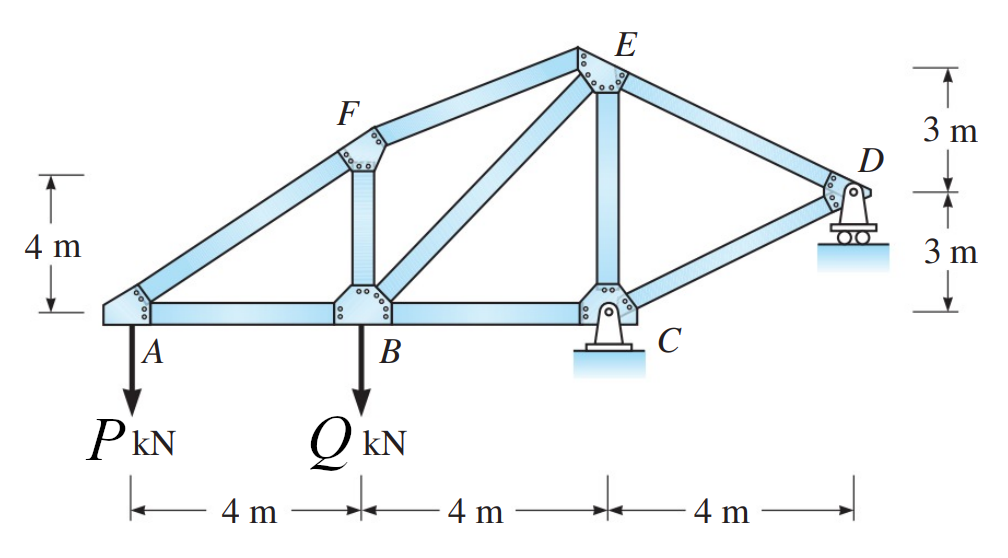

In [ ]:
def isIn(array, key):
  for arr in array:
    if arr == key:
      return 1
  return 0

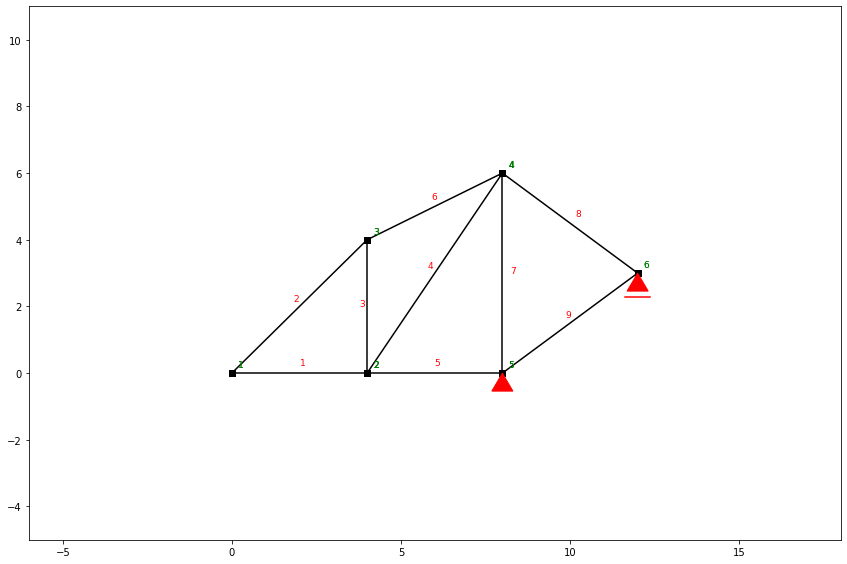

In [ ]:
ss = SystemElements()

# Dicionário para os nós:
node={
      "A":(0,0),  "B":(4,0), "C":(8,0), 
      "D":(12,3), "E":(8,6), "F":(4,4)
     }

# Conectividades entre os nós:
conec=[ ('A', 'B'), ('A', 'F'), ('B', 'F'), 
        ('B', 'E'), ('B', 'C'), ('E', 'F'),
        ('E', 'C'), ('E', 'D'), ('C', 'D')
      ]

# As conectividades geram os elementos:
for e in conec:
  element = (node[e[0]], node[e[1]])
  ss.add_truss_element(location = element)  

# Apoios:
nc = ss.find_node_id(node['C'])
nd = ss.find_node_id(node['D'])
ss.add_support_hinged(node_id=nc)   
ss.add_support_roll(node_id=nd)  

# Mostra a estrutura, sem os carregamentos:
ss.show_structure()

# Carregamentos:
P = np.arange(0, 45+1, 1)
Q = np.arange(0, 45+1, 1)
node_A = ss.find_node_id(node['A'])
node_B = ss.find_node_id(node['B'])
P_viaveis = []
Q_viaveis = []
for p in P:
  for q in Q:
    if p!=0 or q!=0:
      ss.point_load(node_id=node_A, Fy=-p)     
      ss.point_load(node_id=node_B, Fy=-q) 
      # Resolve a estrutura:
      ss.solve()
      # Resgata os resultados:
      element_results = ss.get_element_results()
      R=[]
      for er in element_results:
        R.append(abs(er['N']))
      # Encontra a força máxima interna das barras:
      max_force = max(R)
      # Verifica se essa força é viável:
      if max_force <= 35:
        if isIn(P_viaveis, p) == 0:
          P_viaveis.append(p)
        if isIn(Q_viaveis, q) == 0:
          Q_viaveis.append(q)

A faixa de valores que P pode assumir vai de 0 kN até 17 kN.
A faixa de valores que Q pode assumir vai de 0 kN até 23 kN.

Gráficos com os valores de P e Q viáveis para a força interna máxima de 35kN:



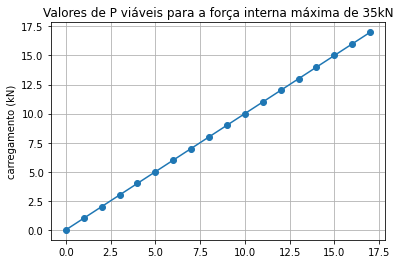

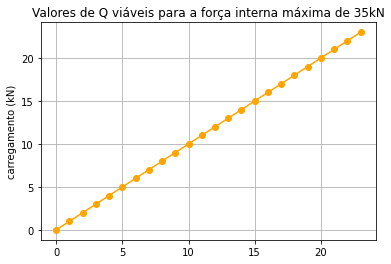

In [ ]:
# Determina a faixa de valores que  P  e  Q  podem assumir:
P_viaveis.sort()
Q_viaveis.sort()
print("A faixa de valores que P pode assumir vai de", P_viaveis[0], "kN até", P_viaveis[len(P_viaveis)-1], "kN.")
print("A faixa de valores que Q pode assumir vai de", Q_viaveis[0], "kN até", Q_viaveis[len(Q_viaveis)-1], "kN.")

# Construção do gráfico:
print("\nGráficos com os valores de P e Q viáveis para a força interna máxima de 35kN:\n")
pl.plot(P_viaveis, 'o-')
pl.title("Valores de P viáveis para a força interna máxima de 35kN")
pl.ylabel('carregamento (kN)')
pl.grid()
pl.show()
print("\n")
pl.plot(Q_viaveis, 'o-', color='orange')
pl.title("Valores de Q viáveis para a força interna máxima de 35kN")
pl.ylabel('carregamento (kN)')
pl.grid()
pl.show()

# Problema 4 (20 pontos)



Considere a viga abaixo submetida a um carregamento móvel.
Para uma seção qualquer (localizada a uma distância $x$ do ponto A), a passagem do veículo gera uma variação dos esforços (na seção) à medida que o veículo se desloca do ponto A até o ponto B.

A proposta deste problema é desenvolver uma envoltória limite para a passagem da carga móvel conforme mostrado acima.
As envoltórias limites de um determinado esforço em uma estrutura
descrevem para um conjunto de cargas móveis ou acidentais, os valores
máximos e mínimos deste esforço em cada uma das seções da estrutura, de
forma análoga a que descreve o diagrama de esforços para um carregamento
fixo. 


Determine para cada ponto da seção os valores máximos e mínimos do momento fletor decorrentes da passagem do veículo.
Faça um gráfico da solução apresentando a envoltória. Discuta o resultado.

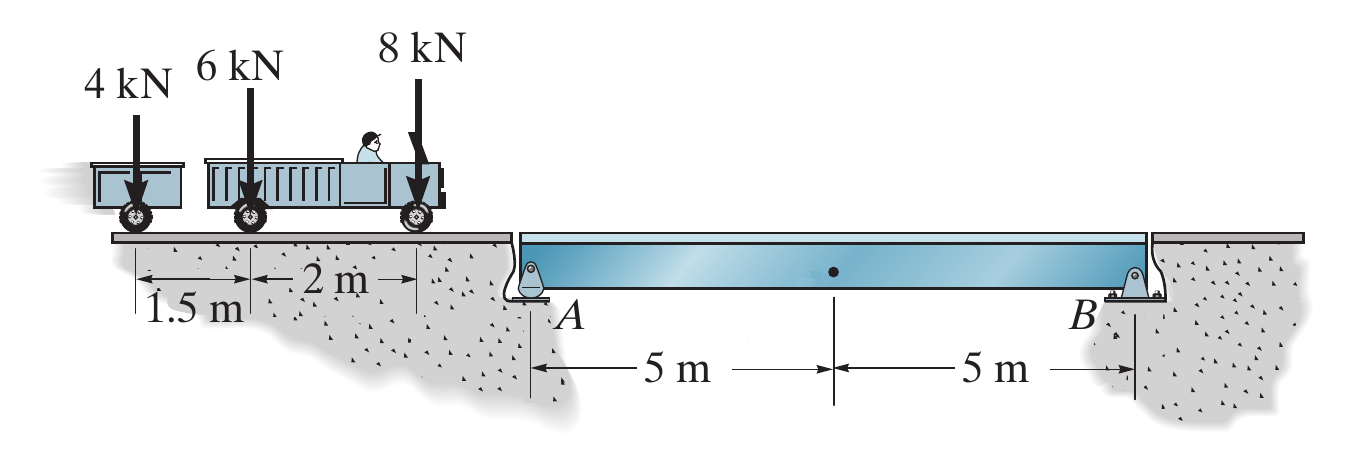

A_y + B_y - P_1 - P_2 - P_3

2*B_y*a - 2*P_1*a - 8*P_2 - 6.5*P_3

A_y + B_y - 18

10*B_y - 154.0

{A_y: 2.60000000000000, B_y: 15.4000000000000}

a

2.6*x

2.6*x - 20.0

2.6*x - 23.0

2.6*x - 19.0

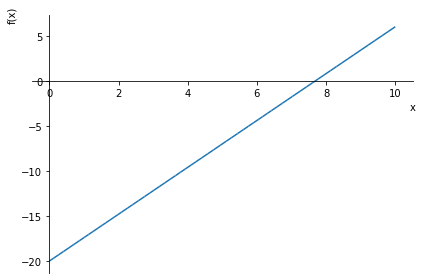

In [ ]:
P_1,P_2,P_3,x,A_y,B_y, L = sp.var('P_1 P_2 P_3 x A_y B_y L')
a = sp.var('a')
values={'a':5, 'P_1':8, 'P_2':6, 'P_3':4 }

# equilíbrio de forças verticais
eq_1 = A_y + B_y - P_1 - P_2 - P_3

# equilíbrio de momentos em torno de A
eq_2 = (B_y*(2*a)) - (P_1*(2*a)) - (P_2*8) - (P_3*6.5)  

display(eq_1, eq_2)
display(eq_1.subs(values), eq_2.subs(values)) 

# solução do sistema para a reações de apoio
reaction_forces = sp.solve(
      [eq_1.subs(values),eq_2.subs(values)],
      [A_y,B_y],
    )
display(reaction_forces)
display(a)
x, pos_1, pos_2, pos_3 =sp.var('x pos_1 pos_2 pos_3')

distancia = np.arange(0,13,0.5)
for i in range(len(distancia)):
  pos_1= distancia[i]

  pos_2 = pos_1 - 2

  pos_3 = pos_2 - 1.5

  # Momento fletor, antes do carrinho passar pela ponte
  M_0 = A_y*x

  # primeira roda com o carregamento está na ponte
  M_1 = M_0 + P_1*(2*a-pos_1)      

  # duas rodas na ponte
  M_2 = M_0 + P_1*(2*a-pos_1) + P_2*(2*a-pos_2) 

  # o carro inteiro na ponte
  M_3 = M_0 + P_1*(2*a-pos_1) + P_2*(2*a-pos_2) +  P_3*(2*a-pos_3)

  M = sp.Piecewise(
    (M_0.subs(values).subs(reaction_forces),pos_1 == 0),
    (M_1.subs(values).subs(reaction_forces),pos_1 > 0),
    (M_2.subs(values).subs(reaction_forces),pos_2 > 0),
    (M_3.subs(values).subs(reaction_forces),pos_3 > 0),
    )

display(M_0.subs(values).subs(reaction_forces), M_1.subs(values).subs(reaction_forces), 
        M_2.subs(values).subs(reaction_forces), M_3.subs(values).subs(reaction_forces))

sp.plot(M,(x,0,10))


# Problema 5 (20 pontos)



A viga abaixo suporta o carregamento indicado. Determine o valor de $x$ que  o momento máximo positivo seja igual ao momento máximo negativo. Especifique o valor encontrado e desenhe o diagrama.

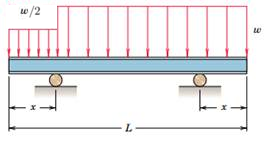

x = 0.1
Momentos: [-8.75775146846891e-14, 0.05000000149476591, 0.09999980926220374]


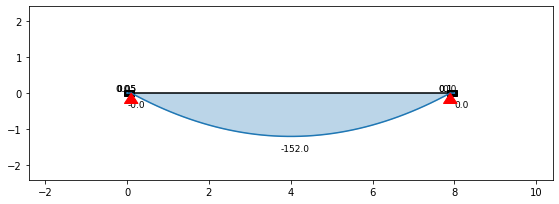

x = 0.5
Momentos: [-6.42264019745653e-14, 1.249999999999858, 2.4999999999998717]


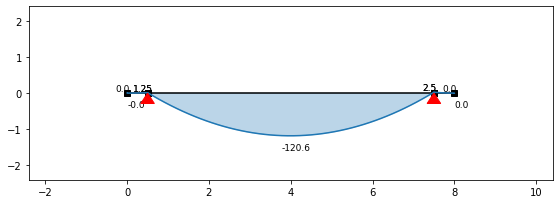

x = 0.7000000000000001
Momentos: [-1.854627562636324e-13, 2.4499999165530255, 4.899997329712403]


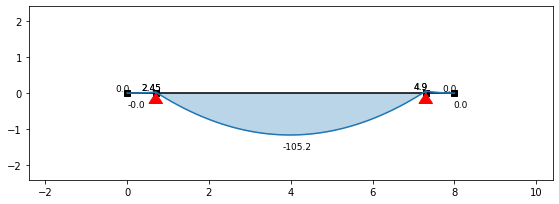

x = 1.0
Momentos: [-2.000621890374532e-13, 4.99999999999995, 10.000000000000055]


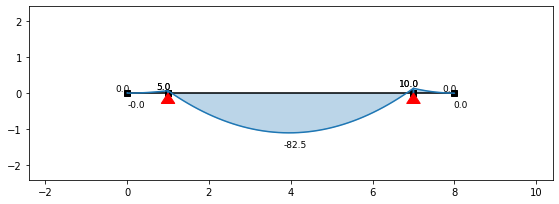

x = 1.3000000000000003
Momentos: [-4.218847493575595e-15, 8.449999380111649, 16.90000495910676]


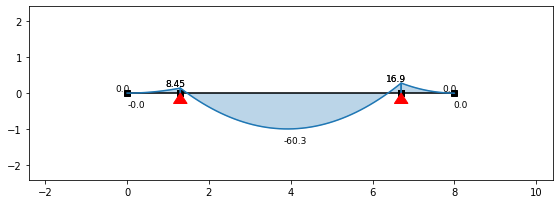

x = 1.4000000000000001
Momentos: [-2.886579864025407e-15, 9.799999666213921, 19.600002670288266]


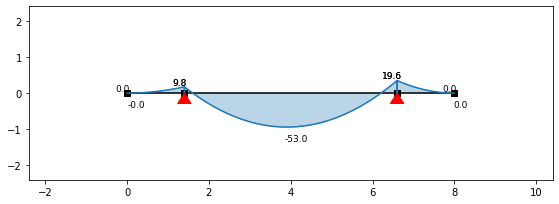

x = 1.6
Momentos: [-1.6431300764452317e-14, 12.800000381469754, 25.599996948242254]


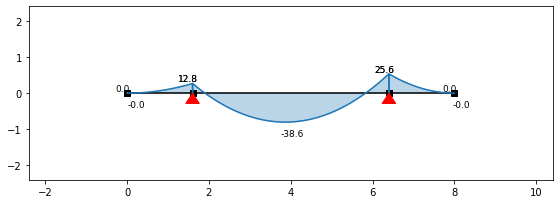

x = 1.9000000000000001
Momentos: [-2.6645352591003757e-15, 18.049999547004703, 36.1000036239625]


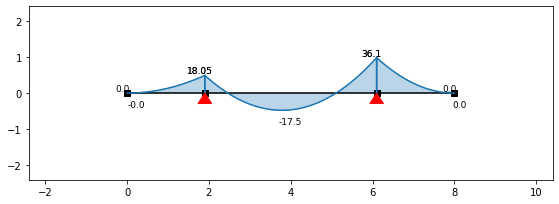

x = 2.1
Momentos: [-1.3322676295501878e-15, 22.04999799728401, 44.09999599456798]


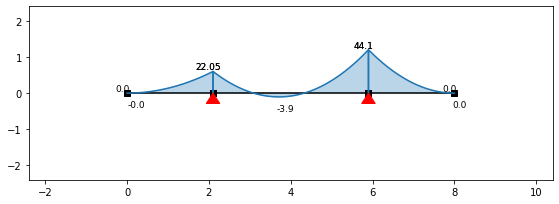

x = 2.3000000000000003
Momentos: [-4.440892098500626e-15, 26.449998903274622, 52.9000087738041]


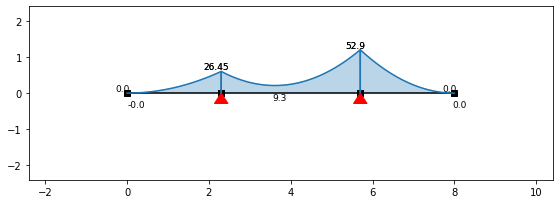

x = 2.4000000000000004
Momentos: [-1.4210854715202004e-14, 28.80000228881838, 57.600004577636774]


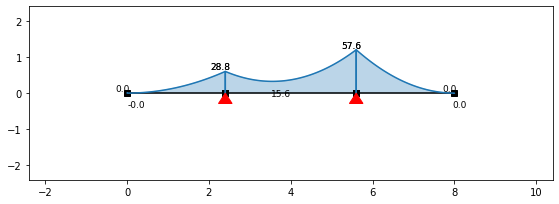

x = 2.8000000000000003
Momentos: [-1.1546319456101628e-14, 39.199998664855926, 78.40001068115272]


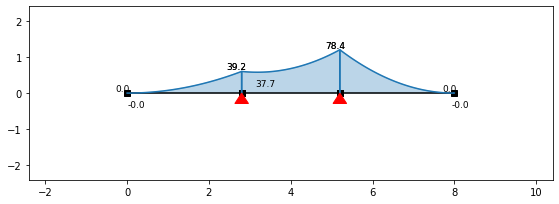

x = 3.0000000000000004
Momentos: [-1.0658141036401503e-14, 45.00000000000002, 90.00000000000011]


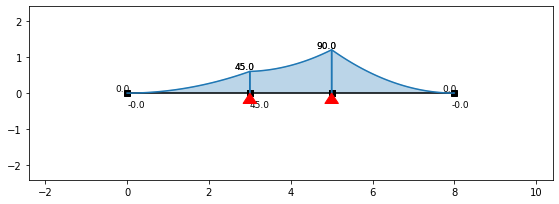

x = 3.1
Momentos: [-1.7763568394002505e-15, 48.049997043609736, 96.09999408721934]


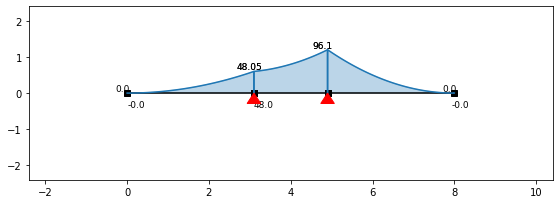

x = 3.7
Momentos: [-1.4210854715202004e-14, 68.45000176429745, 136.89998588562054]


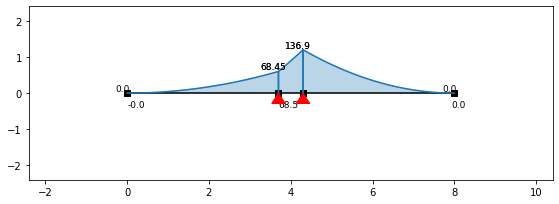

x = 3.8000000000000003
Momentos: [-5.329070518200751e-15, 72.19999818801871, 144.40001449584986]


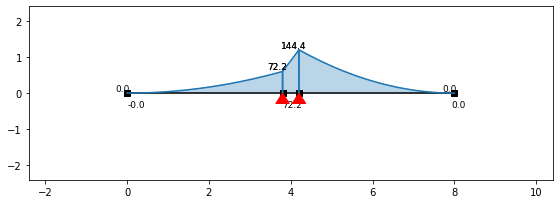

In [ ]:
# Informações da estrutura:
L = 8   #comprimento
w = 20  #carregamento
intervalo_x = np.arange(0.1, L/2, 0.1)  #possíveis valores para x
M_max_positivos = []
M_max_negativos = []

for x in intervalo_x:
  ss = SystemElements()

  # Dicionário para os nós:
  node={"A":(0,0), "B":(x,0), "C":(L-x,0), "D":(L,0)}

  # Conectividades entre os nós:
  conec=[ ('A', 'B'), ('B', 'C'), ('C', 'D') ]

  # As conectividades geram os elementos:
  for e in conec:
    element = (node[e[0]], node[e[1]])
    ss.add_element(location = element)
  
  # Apoios:
  nb = ss.find_node_id(node['B'])
  nc = ss.find_node_id(node['C'])
  ss.add_support_hinged(node_id=nb)   
  ss.add_support_hinged(node_id=nc) 

  # Carregamentos distribuídos:
  ss.q_load(element_id=1, q=-w/2, direction='y')
  ss.q_load(element_id=2, q=-w, direction='y')
  ss.q_load(element_id=3, q=-w, direction='y')

  # Solução do sistema estrutural
  ss.solve()
  if(ss.get_element_result_range('moment')[0] < 0):
    M_max_positivos.append(ss.get_element_result_range('moment')[2])
    M_max_negativos.append(ss.get_element_result_range('moment')[0])
    print("x =", x)
    print("Momentos: " + str(ss.get_element_result_range('moment')))
    ss.show_bending_moment(scale=0.8, figsize=(8,3), offset=(0,0))

In [ ]:
index = -1

for i in range (len(M_max_negativos)):
  if(M_max_positivos[i] == abs(M_max_negativos[i])):
    index = i
    break

if(index != -1):
  print("O valor de x que gera o momento máximo positivo igual ao momento máximo negativo é: " + str(intervalo_x[index]))
  print("O valor do momento máximo positivo para essa posição é: " + str(M_max_positivos[index]))
else:
  print("Não foi posível encontrar um valor válido para x que faça com que o momento máximo positivo seja igual ao momento máximo negativo.")


Não foi posível encontrar um valor válido para x que faça com que o momento máximo positivo seja igual ao momento máximo negativo.
